In [1]:
#import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

#set plot style
sns.set(color_codes=True)

In [2]:
#Reading and loading data
client_data=pd.read_csv(r'D:\Projects\BCG_Internship\Data\client_data.csv')
price_data=pd.read_csv(r'D:\Projects\BCG_Internship\Data\price_data.csv')

In [3]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
#Shape of data
print(f'client_data_shape {client_data.shape}\nprice_data_shape {price_data.shape}')

client_data_shape (14606, 26)
price_data_shape (193002, 8)


In [6]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
#Statistics of the data
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# check for duplicates and null values

In [10]:
client_data.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [11]:
price_data.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

# as we can see that there are no any missing values in datasets.

In [12]:
# Check for duplicates

In [13]:
client_data.duplicated().sum()

0

In [14]:
price_data.duplicated().sum()

0

# Data Visualization/distribution and EDA

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'foosdfpfkusacimwkcsosbicdxkicaua'),
  Text(1, 0, 'MISSING'),
  Text(2, 0, 'lmkebamcaaclubfxadlmueccxoimlema'),
  Text(3, 0, 'usilxuppasemubllopkaafesmlibmsdf'),
  Text(4, 0, 'ewpakwlliwisiwduibdlfmalxowmwpci'),
  Text(5, 0, 'epumfxlbckeskwekxbiuasklxalciiuu'),
  Text(6, 0, 'sddiedcslfslkckwlfkdpoeeailfpeds'),
  Text(7, 0, 'fixdbufsefwooaasfcxdxadsiekoceaa')])

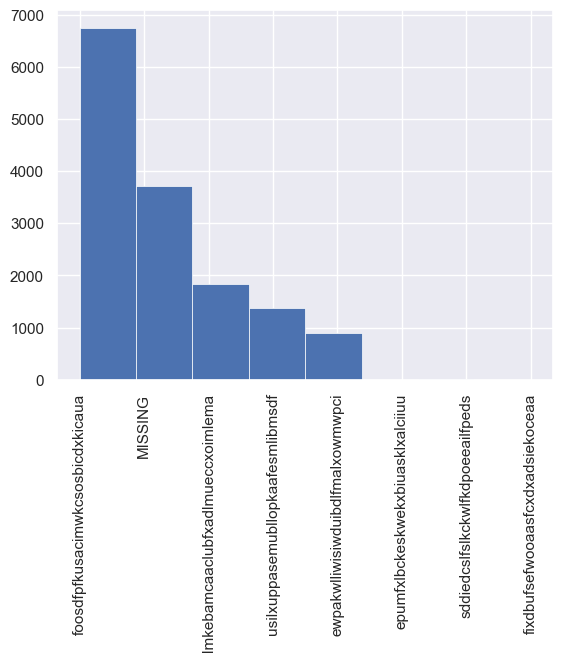

In [15]:
#Distribution of categorical data
x=client_data['channel_sales']
plt.hist(x, bins=8, linewidth=0.5, edgecolor="white")
plt.xticks(rotation=90)

From above graph we can see, which channel is being used more

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'lxidpiddsbxsbosboudacockeimpuepw'),
  Text(1, 0, 'kamkkxfxxuwbdslkwifmmcsiusiuosws'),
  Text(2, 0, 'ldkssxwpmemidmecebumciepifcamkci'),
  Text(3, 0, 'MISSING'),
  Text(4, 0, 'usapbepcfoloekilkwsdiboslwaxobdp'),
  Text(5, 0, 'ewxeelcelemmiwuafmddpobolfuxioce')])

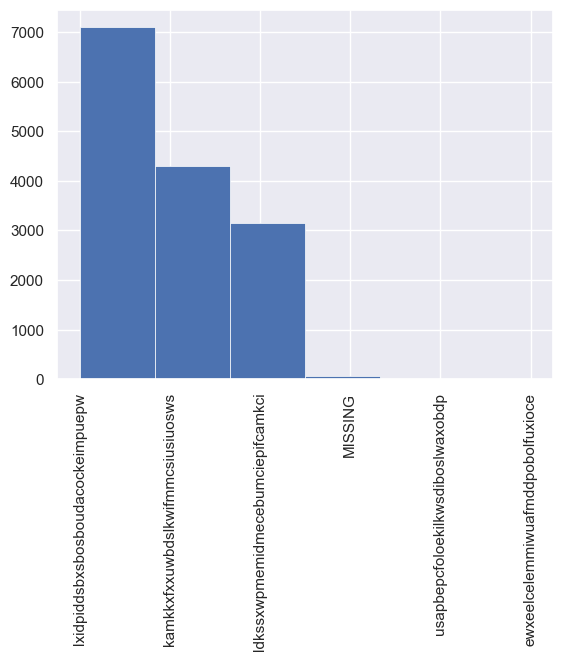

In [16]:
#Distribution of categorical data
x=client_data['origin_up']
plt.hist(x, bins=6, linewidth=0.5, edgecolor="white")
plt.xticks(rotation=90)

# visualisation distribution of numerical data


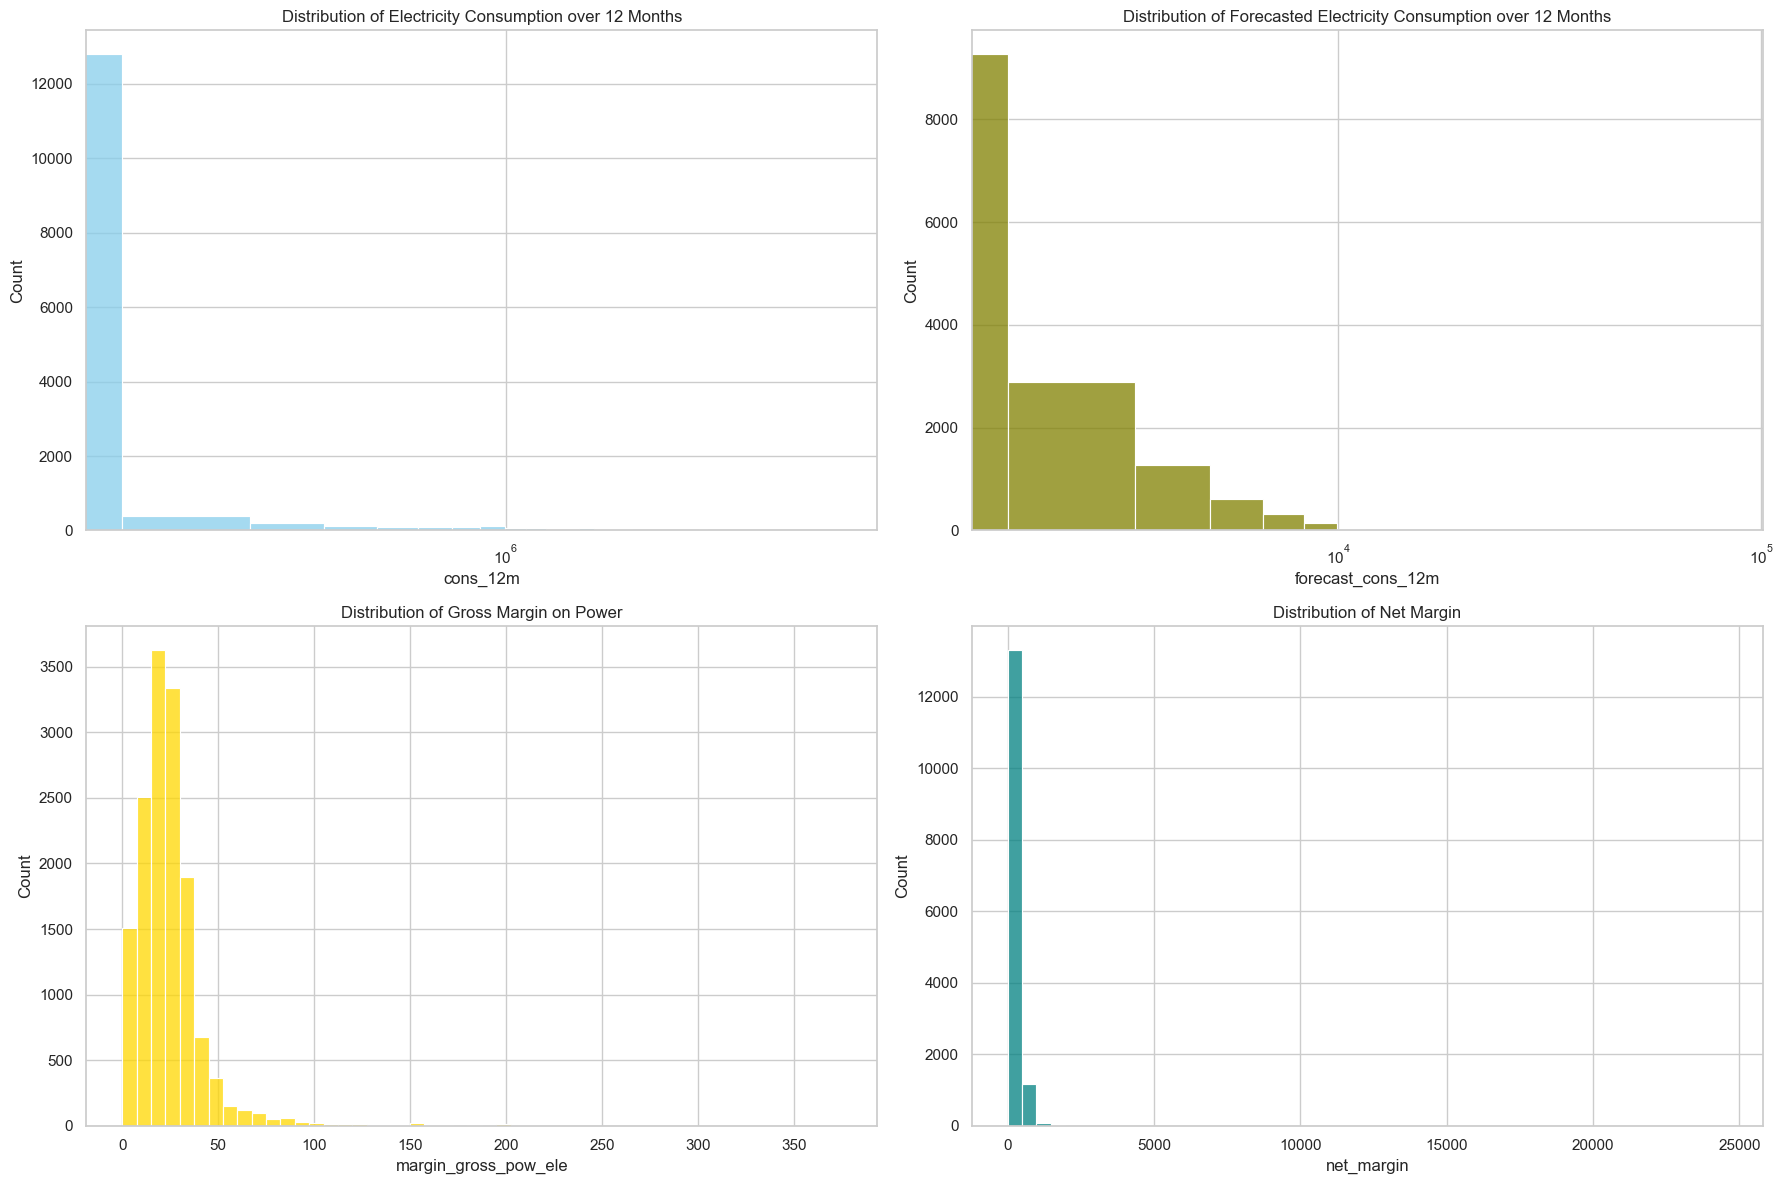

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Plotting distributions of some numerical columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Distribution of electricity consumption over 12 months
sns.histplot(client_data['cons_12m'], bins=50, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Electricity Consumption over 12 Months')
axes[0, 0].set_xscale('log')

# Distribution of forecasted electricity consumption over 12 months
sns.histplot(client_data['forecast_cons_12m'], bins=50, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Distribution of Forecasted Electricity Consumption over 12 Months')
axes[0, 1].set_xscale('log')

# Distribution of gross margin on power
sns.histplot(client_data['margin_gross_pow_ele'], bins=50, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Distribution of Gross Margin on Power')

# Distribution of net margin
sns.histplot(client_data['net_margin'], bins=50, ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Distribution of Net Margin')

plt.tight_layout()
plt.show()

* The distribution of 'electricity consumption' and 'forecasted consumptions' over 12 months shows a right-skewed distribution, indicating that most customers have lower consumption values, with a few customers having very high consumption.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'foosdfpfkusacimwkcsosbicdxkicaua'),
  Text(1, 0, 'MISSING'),
  Text(2, 0, 'usilxuppasemubllopkaafesmlibmsdf'),
  Text(3, 0, 'lmkebamcaaclubfxadlmueccxoimlema'),
  Text(4, 0, 'ewpakwlliwisiwduibdlfmalxowmwpci')])

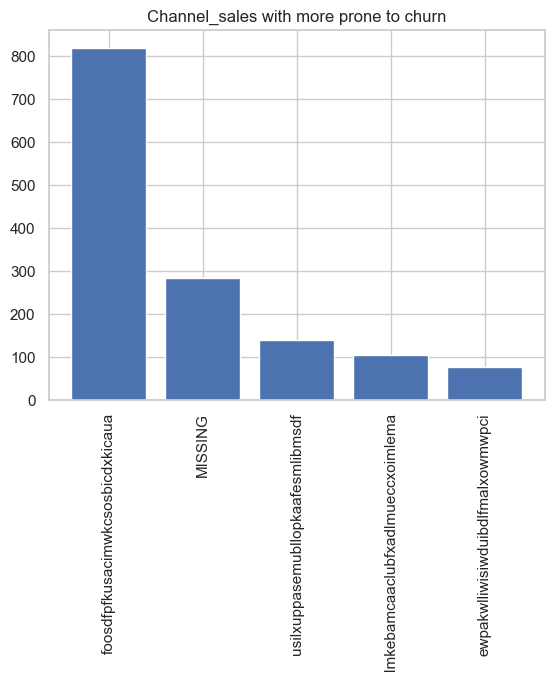

In [18]:
# analysis of categorical data with churn column
churn_1 = client_data[client_data['churn'] == 1]
ch_sale = churn_1.groupby('channel_sales').size().sort_values(ascending=False)
plt.bar(ch_sale.index, ch_sale.values)
plt.title("Channel_sales with more prone to churn")
plt.xticks(rotation=90)


([0, 1, 2, 3],
 [Text(0, 0, 'lxidpiddsbxsbosboudacockeimpuepw'),
  Text(1, 0, 'ldkssxwpmemidmecebumciepifcamkci'),
  Text(2, 0, 'kamkkxfxxuwbdslkwifmmcsiusiuosws'),
  Text(3, 0, 'MISSING')])

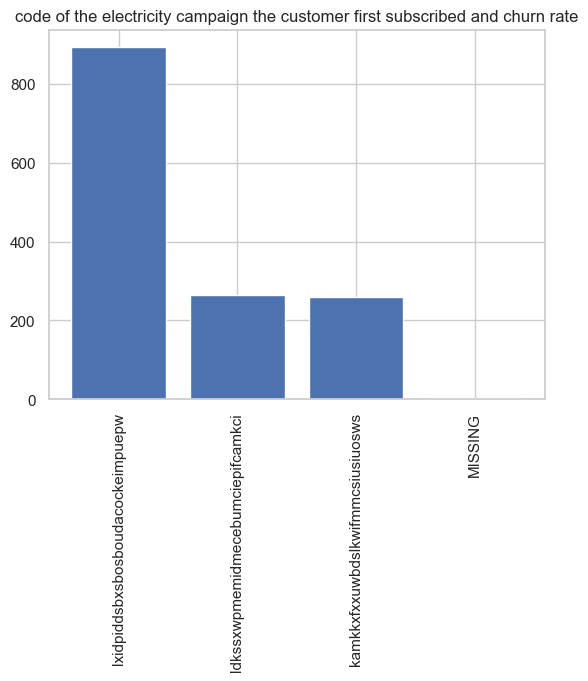

In [19]:
# analysis of categorical data with churn column
churn_1 = client_data[client_data['churn'] == 1]
ch_sale = churn_1.groupby('origin_up').size().sort_values(ascending=False)
plt.bar(ch_sale.index, ch_sale.values)
plt.title("code of the electricity campaign the customer first subscribed and churn rate")
plt.xticks(rotation=90)


C:\Users\bhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


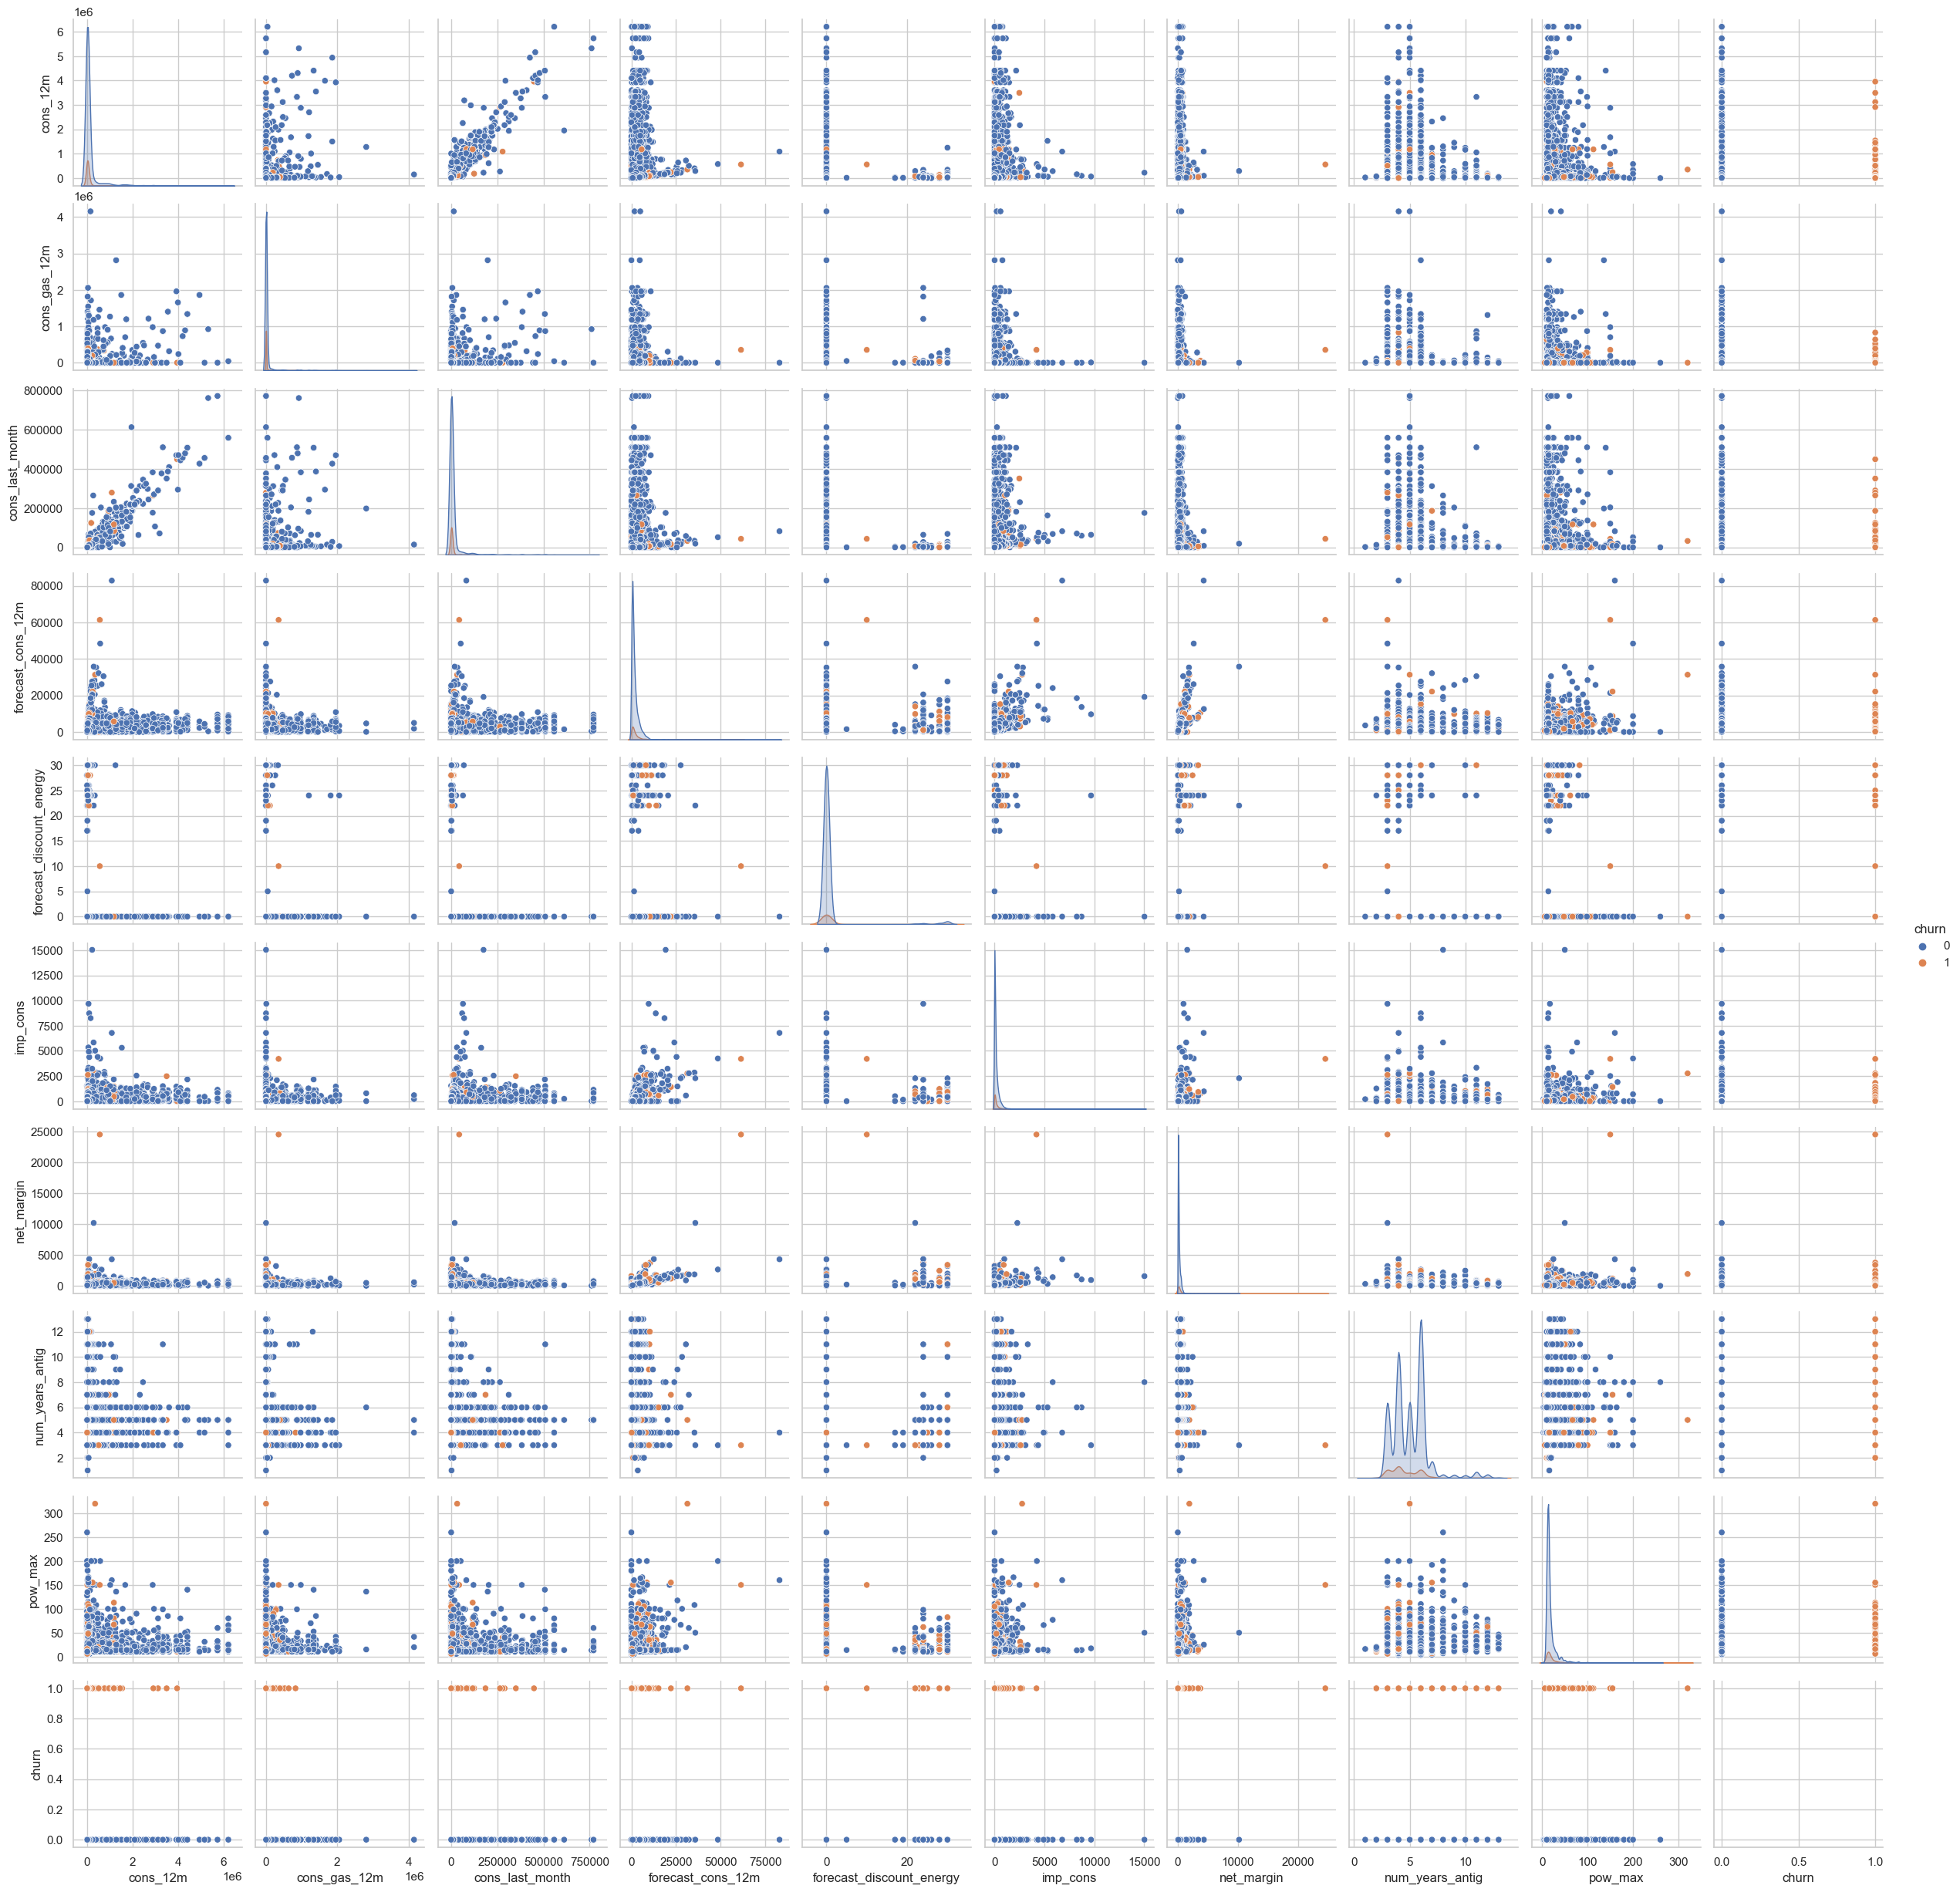

In [20]:
# pair plot to see distribution of data wrt to churn and 
sns.pairplot(client_data,hue="churn",vars=[ 'cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_discount_energy','imp_cons','net_margin', 'num_years_antig', 'pow_max', 'churn'],kind='scatter')

* from above plot we cansay that
1) Data is right skewed
2) No linear relationship with churn ,need to transform the data

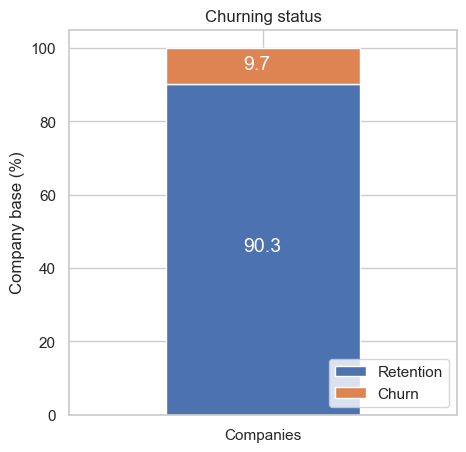

In [21]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

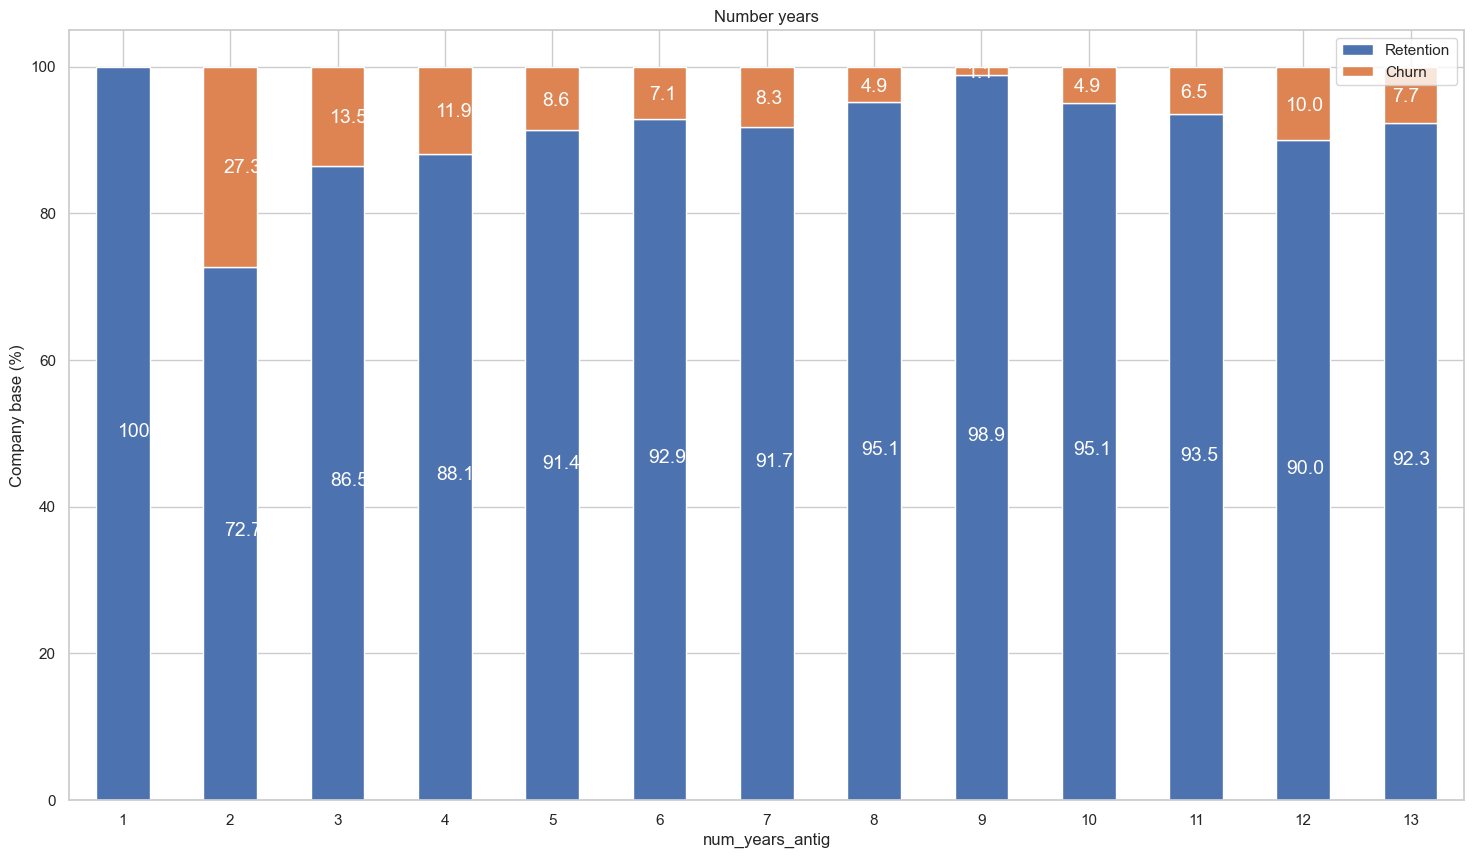

In [22]:
#No of years with company and churn rate
years_antig = client_data.groupby([client_data["num_years_antig"],client_data["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

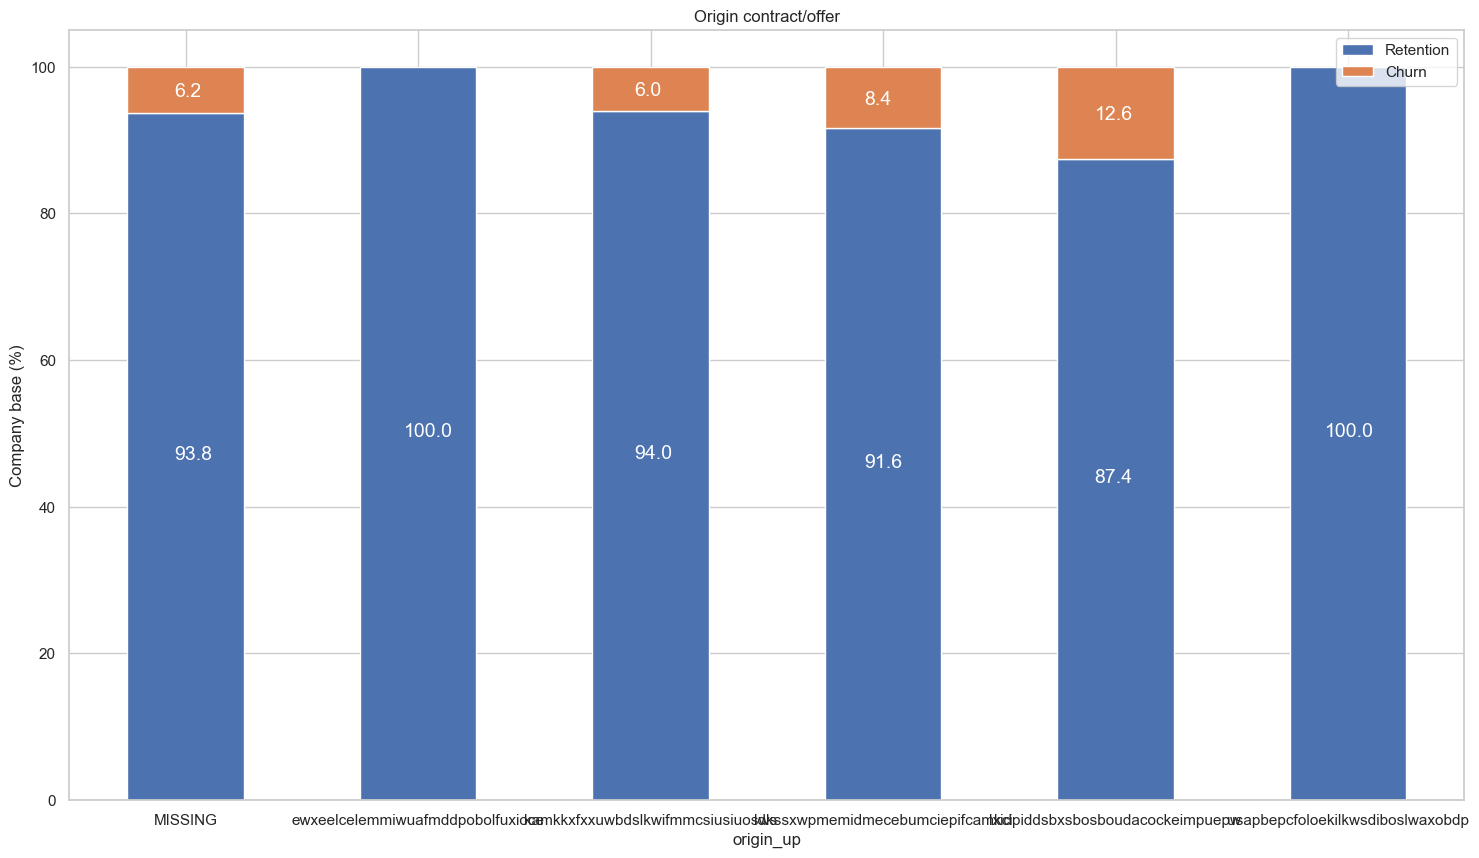

In [23]:
origin = client_data.groupby([client_data["origin_up"],client_data["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

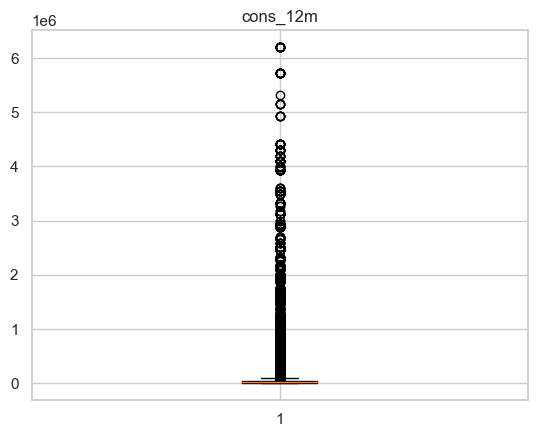

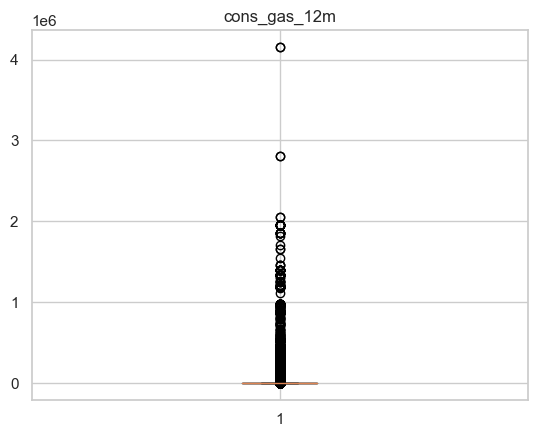

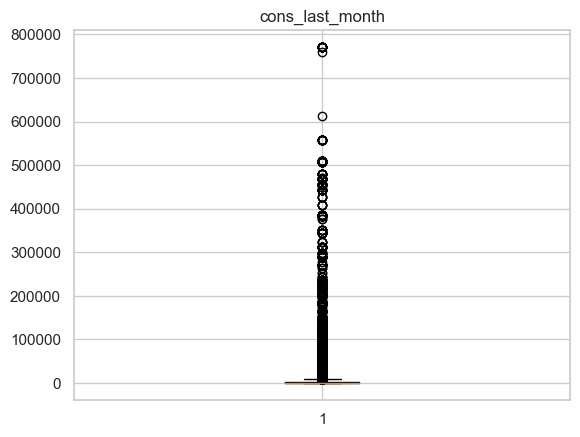

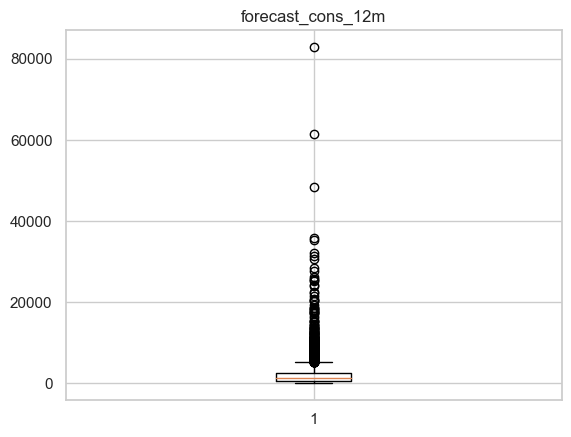

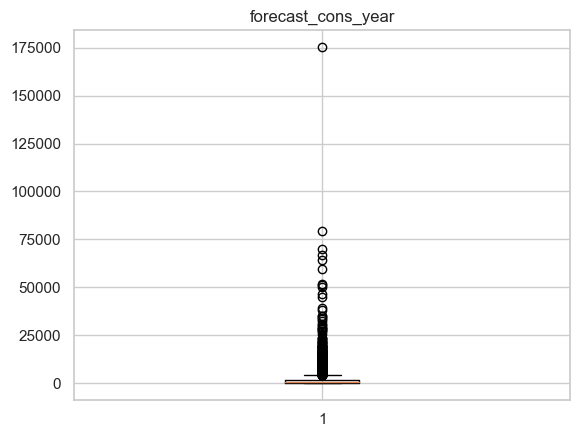

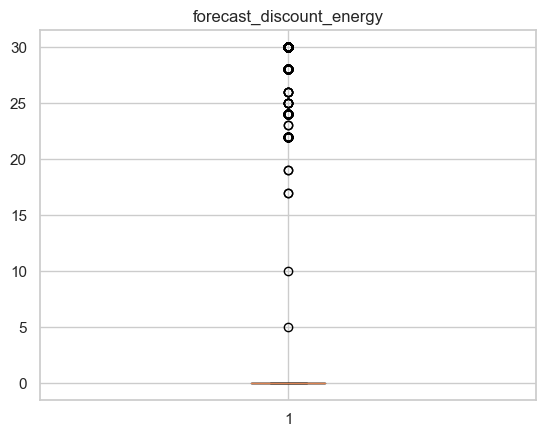

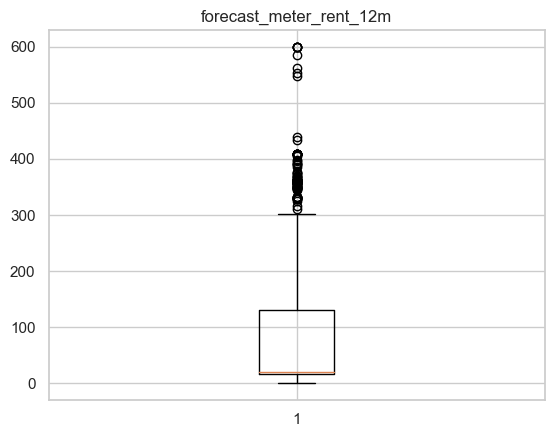

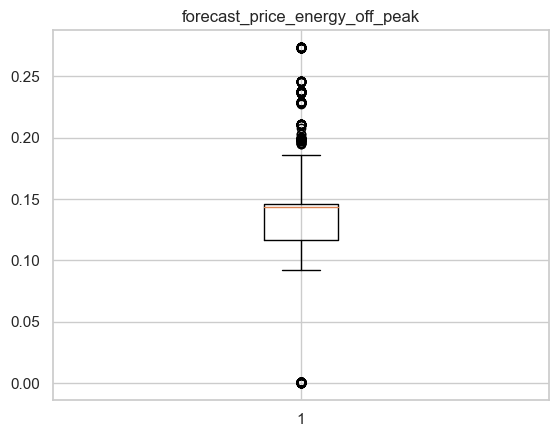

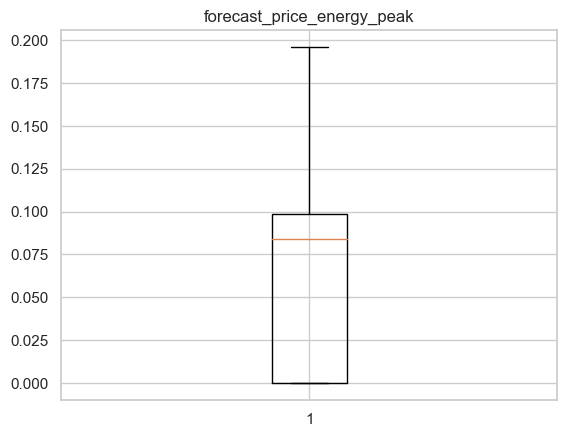

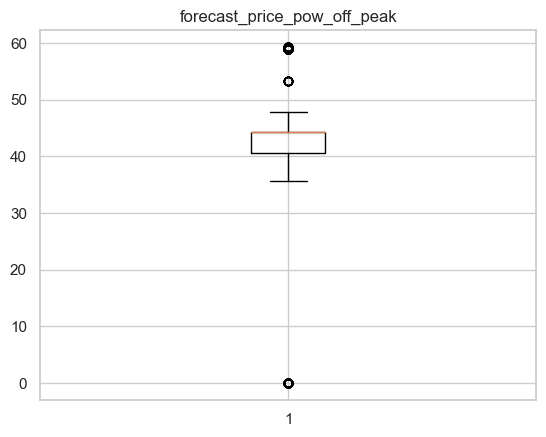

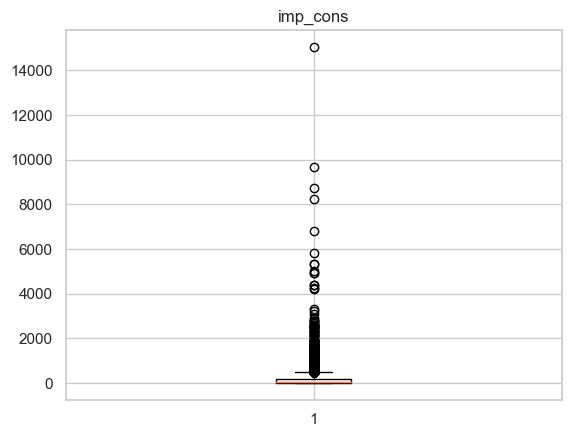

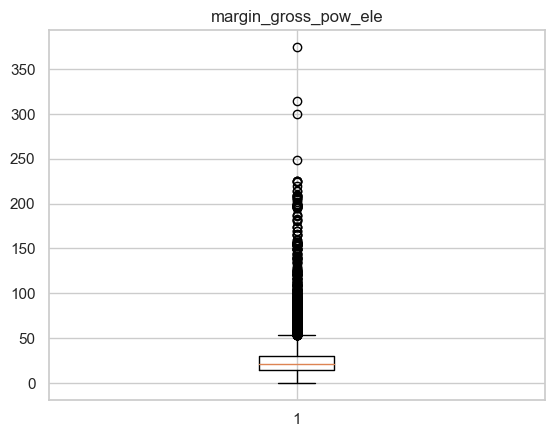

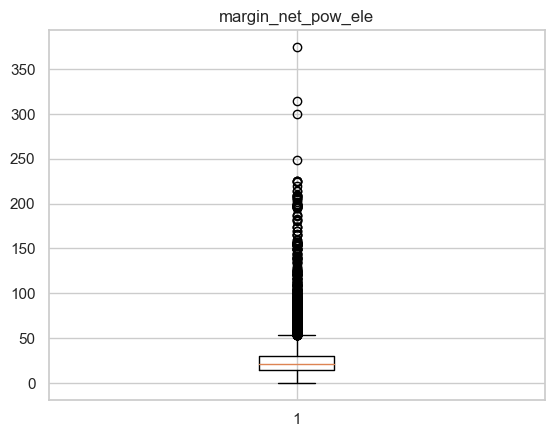

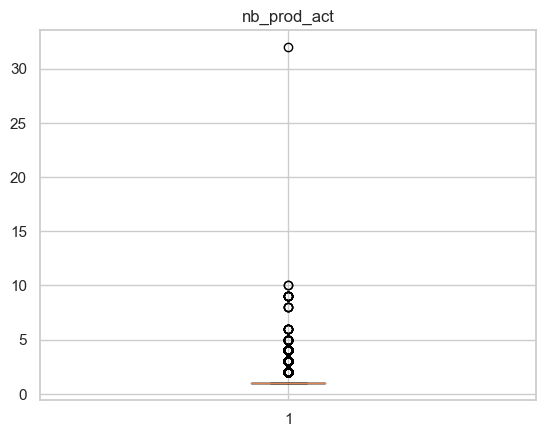

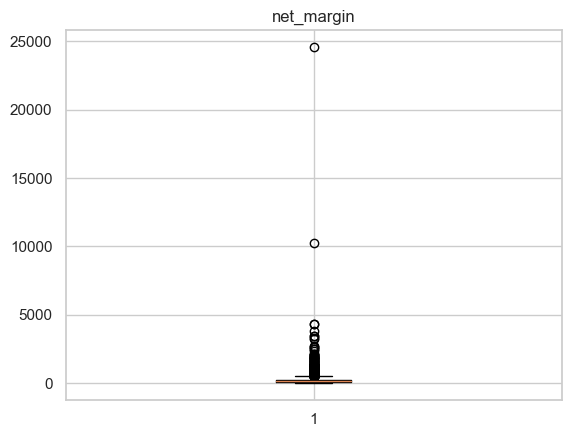

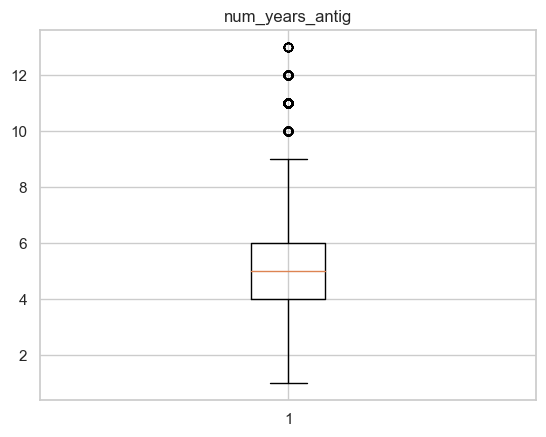

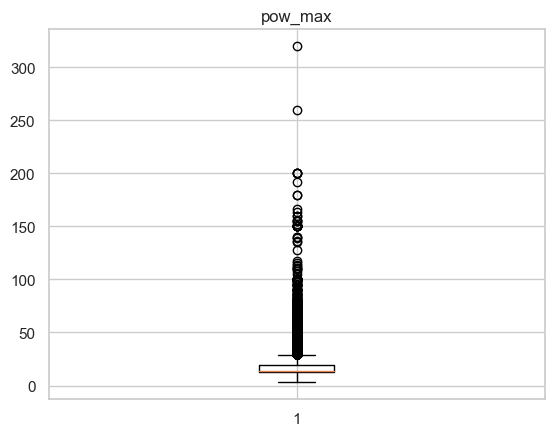

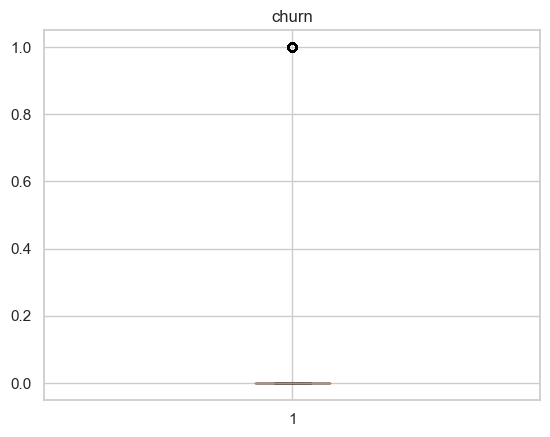

In [24]:
# outlier detection

cols = [cl for cl in client_data.columns if client_data[cl].dtype in ['int64', 'float64']]
for f in cols:
    plt.boxplot(client_data[f])
    plt.title(f)
    plt.show()

##  Hypothesis investigation

Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on churn. First we need to define exactly what is price sensitivity.

    > Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [25]:
# Transform date columns to datetime type
client_data["date_activ"] = pd.to_datetime(client_data["date_activ"], format='%Y-%m-%d')
client_data['date_end']=pd.to_datetime(client_data['date_end'],format='%Y-%m-%d')
client_data["date_modif_prod"] = pd.to_datetime(client_data["date_modif_prod"], format='%Y-%m-%d')
client_data["date_renewal"] = pd.to_datetime(client_data["date_renewal"], format='%Y-%m-%d')
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format='%Y-%m-%d')



# Create mean average data
mean_year = price_data.groupby(['id']).mean().reset_index()
mean_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_year_price_p1_var",   
        "price_peak_var": "mean_year_price_p2_var",
        "price_mid_peak_var": "mean_year_price_p3_var",
        "price_off_peak_fix": "mean_year_price_p1_fix",
        "price_peak_fix": "mean_year_price_p2_fix",
        "price_mid_peak_fix": "mean_year_price_p3_fix"
    }
)

mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_6m_price_p1_var",
        "price_peak_var": "mean_6m_price_p2_var",
        "price_mid_peak_var": "mean_6m_price_p3_var",
        "price_off_peak_fix": "mean_6m_price_p1_fix",
        "price_peak_fix": "mean_6m_price_p2_fix",
        "price_mid_peak_fix": "mean_6m_price_p3_fix"
    }
)
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_p1_var",
        "price_peak_var": "mean_3m_price_p2_var",
        "price_mid_peak_var": "mean_3m_price_p3_var",
        "price_off_peak_fix": "mean_3m_price_p1_fix",
        "price_peak_fix": "mean_3m_price_p2_fix",
        "price_mid_peak_fix": "mean_3m_price_p3_fix"
    }
)
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [26]:
price_features.shape,client_data.shape

((16095, 31), (14606, 26))

* Now lets merge in the churn data and see whether price sensitivity has any correlation with churn

In [27]:
price_analysis = pd.merge(price_features, client_data[['id', 'churn']], on='id')
price_analysis.head()

,id,price_date_x,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


In [28]:
price_analysis.columns

Index(['id', 'price_date_x', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'price_date_y', 'mean_6m_price_p1_var',
       'mean_6m_price_p2_var', 'mean_6m_price_p3_var', 'mean_6m_price_p1_fix',
       'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1',
       'mean_6m_price_p2', 'mean_6m_price_p3', 'price_date',
       'mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix',
       'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3', 'churn'],
      dtype='object')

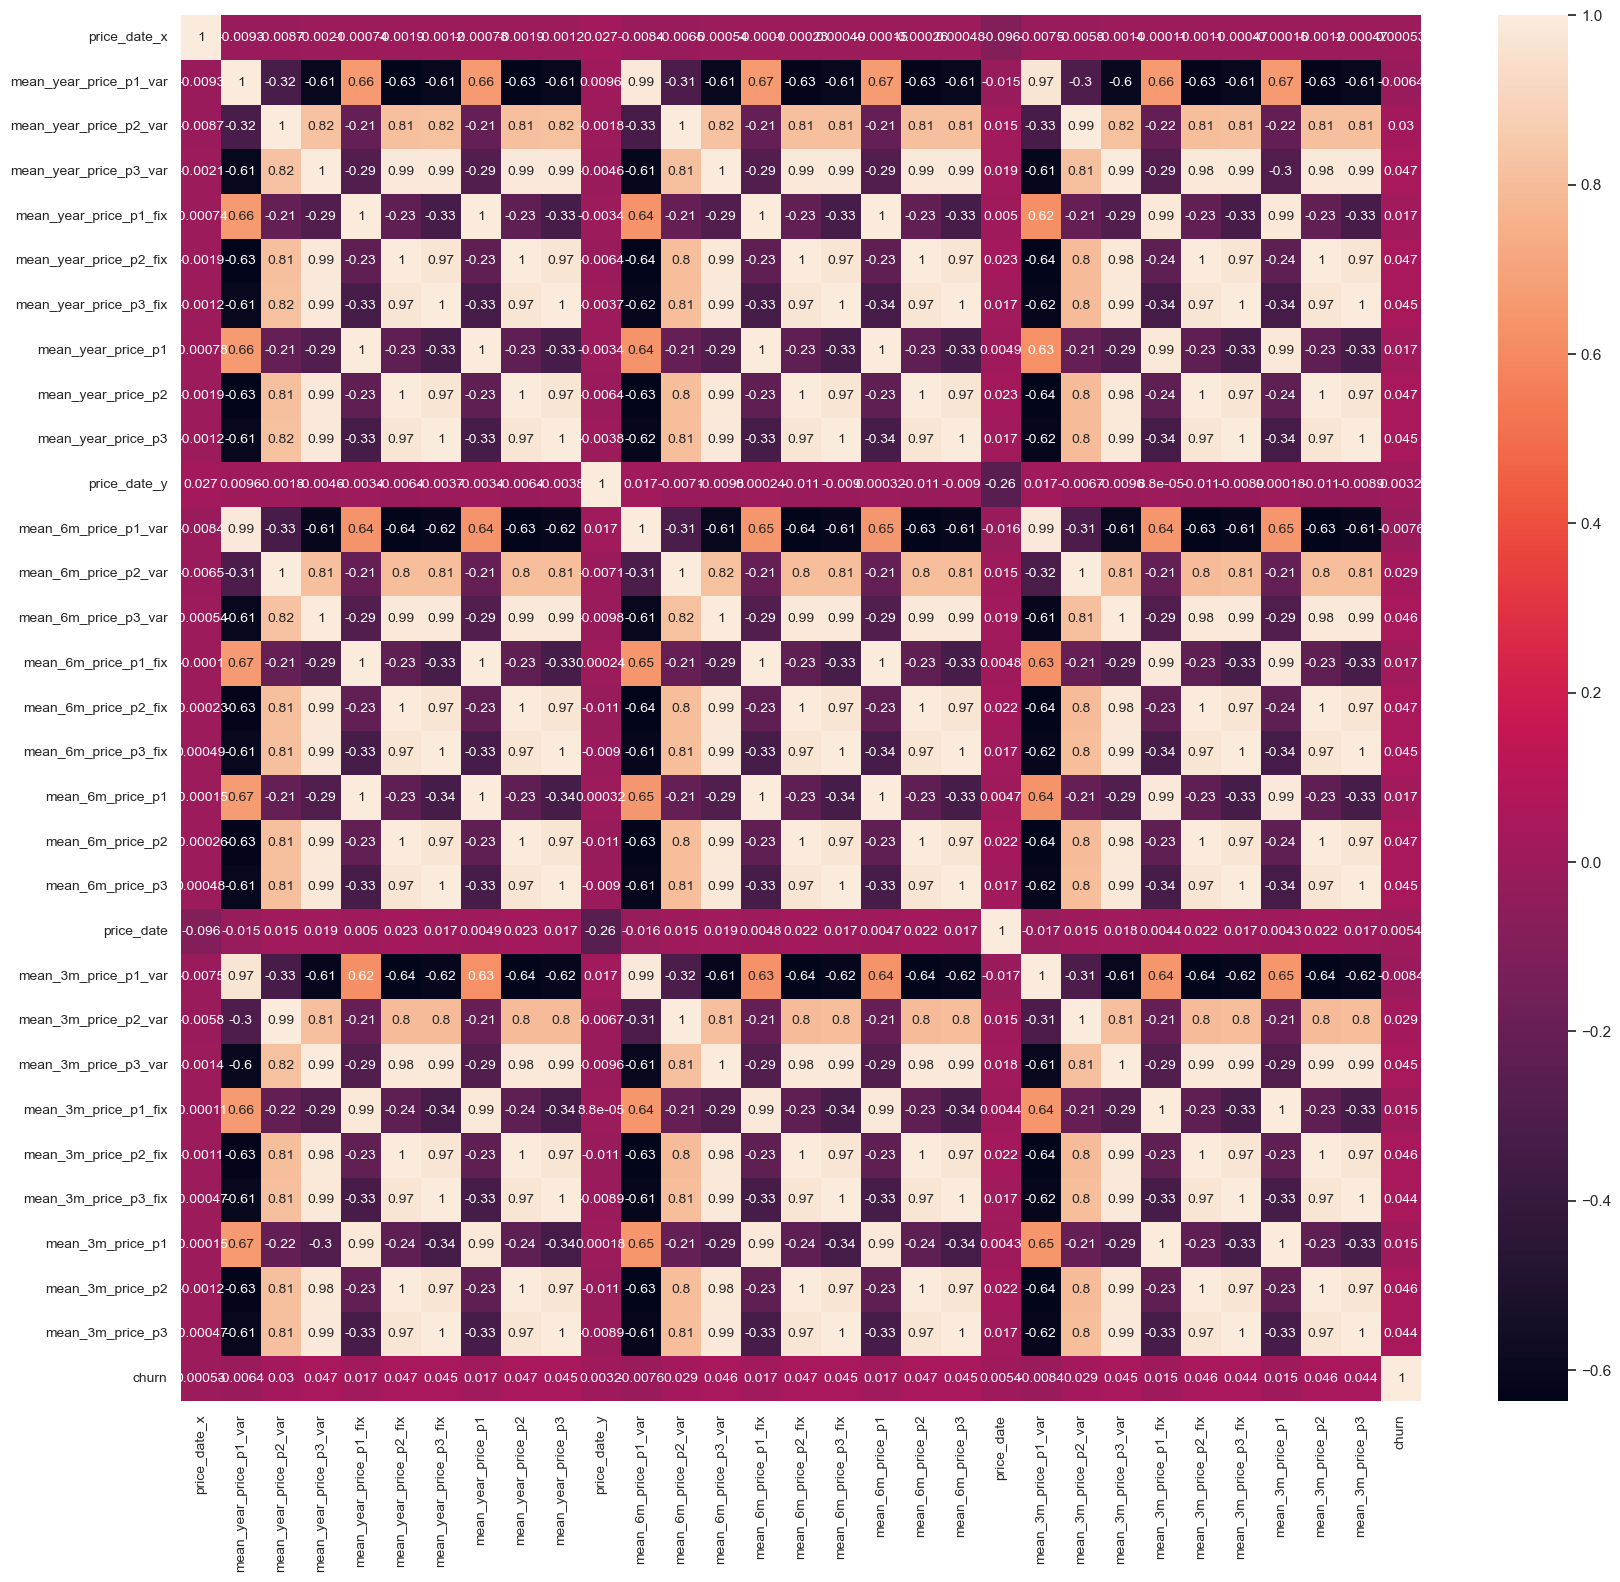

In [29]:
price_ana=price_analysis[['price_date_x', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'price_date_y', 'mean_6m_price_p1_var',
       'mean_6m_price_p2_var', 'mean_6m_price_p3_var', 'mean_6m_price_p1_fix',
       'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1',
       'mean_6m_price_p2', 'mean_6m_price_p3', 'price_date',
       'mean_3m_price_p1_var', 'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix',
       'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3', 'churn']]
corr = price_ana.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot, it shows a higher magnitude of correlation between other price sensitivity variables, however overall the correlation with churn is very low. This indicates that there is a weak linear relationship between price sensitity and churn. This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the feature differently.

In [30]:
merged_data = pd.merge(client_data.drop(columns=['churn']), price_analysis, on='id')

In [31]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [34]:
merged_data.to_csv('clean_data_after_eda.csv',index=False)